In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
user_input = input("Please enter a business type").lower()

In [3]:
print(user_input)

agent


In [4]:
df = pd.read_csv("../data/review_dataset.csv")
df = pd.dfFrame(df)
df.dropna()



,Business Name,Street Number,Route,Postal Town,County,Country,Postcode,Overall Rating,Language,Rating,Review Description,Time,Date,processed review,lemmatized review
0,Nails and the City,46,Kenyon Street,Birmingham,West Midlands,United Kingdom,B18 6AR,4.7,en,5.0,have to say this is the best salon ive ever be...,1.652418e+09,2022-05-13 05:07:20,say best salon ive ever 4 weeks lifting acryli...,say best salon ive ever 4 week lifting acryli...
1,Nails and the City,46,Kenyon Street,Birmingham,West Midlands,United Kingdom,B18 6AR,4.7,en,5.0,nian is incredible ive been coming here for a ...,1.661441e+09,2022-08-25 15:22:45,nian incredible ive coming couple months every...,nian incredible ive coming couple month every...
2,Nails and the City,46,Kenyon Street,Birmingham,West Midlands,United Kingdom,B18 6AR,4.7,en,5.0,i got a new set of gels from tee who was so so...,1.658412e+09,2022-07-21 14:04:52,got new set gels tee lovely chat helped choose...,got new set gel tee lovely chat helped choose...
3,Nails and the City,46,Kenyon Street,Birmingham,West Midlands,United Kingdom,B18 6AR,4.7,en,5.0,i have been coming to this salon since i moved...,1.660734e+09,2022-08-17 10:57:00,coming salon since moved birmingham took find ...,coming salon since moved birmingham took find...
4,Nails and the City,46,Kenyon Street,Birmingham,West Midlands,United Kingdom,B18 6AR,4.7,en,5.0,i had my nails done for the first time and i c...,1.659646e+09,2022-08-04 20:41:01,nails done first time say place super cozy gir...,nail done first time say place super cozy gir...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22374,Super Hand Car Wash,53-55,Llangollen Road,Wrexham,Wrexham Principal Area,United Kingdom,LL14 3RS,5.0,en,5.0,just had ford ranger polished so pleased with ...,1.654364e+09,2022-06-04 17:31:51,ford ranger polished pleased results vehicle l...,ford ranger polished pleased result vehicle l...
22375,Super Hand Car Wash,53-55,Llangollen Road,Wrexham,Wrexham Principal Area,United Kingdom,LL14 3RS,5.0,en,5.0,the name says it all fantastic service great p...,1.641225e+09,2022-01-03 15:44:22,name says fantastic service great prices top q...,name say fantastic service great price top qu...
22376,Super Hand Car Wash,53-55,Llangollen Road,Wrexham,Wrexham Principal Area,United Kingdom,LL14 3RS,5.0,en,5.0,a brilliant super hand car wash drove away spa...,1.652984e+09,2022-05-19 18:06:27,brilliant super hand car wash drove away spark...,brilliant super hand car wash drove away spar...
22377,Super Hand Car Wash,53-55,Llangollen Road,Wrexham,Wrexham Principal Area,United Kingdom,LL14 3RS,5.0,en,5.0,always happy when my black and yellow fiesta c...,1.654781e+09,2022-06-09 13:28:00,always happy black yellow fiesta comes gleamin...,always happy black yellow fiesta come gleamin...


In [5]:

userbusiness = df[df["Business Name"].str.contains(r'{}'.format(user_input),na=True)]
userbusiness = userbusiness.sort_values('Overall Rating')
userbusiness = userbusiness.drop_duplicates(subset=["Business Name"])
print(userbusiness.head(20))

                                           Business Name Street Number  \
8437          Northwood Dundee Letting and Estate agents             2   
12981  DB Roberts Property Centres - Estate agents in...            18   
10656        haart estate and lettings agents Nottingham         16/18   
10552           haart estate and lettings agents Norwich            18   
11616      Haybrook lettings agents Sheffield (Lettings)         43-45   
8134           haart estate and lettings agents Coventry         15-17   
10363         Northwood inc Bowes Mitchell Estate agents           172   
10210     haart estate and lettings agents Milton Keynes           897   
7640                   Darlows estate agents Albany Road           101   
8234              haart estate and lettings agents Derby            24   
11769               haart estate agents Westcliff On Sea       190-194   
8719                             haart estate agents Ely            1a   
8780                          haart es

[Text(0, 0, '4.1'),
 Text(0, 0, '4.4'),
 Text(0, 0, '4.5'),
 Text(0, 0, '4.6'),
 Text(0, 0, '4.6'),
 Text(0, 0, '4.6'),
 Text(0, 0, '4.7'),
 Text(0, 0, '4.7'),
 Text(0, 0, '4.7'),
 Text(0, 0, '4.7'),
 Text(0, 0, '4.8'),
 Text(0, 0, '4.9'),
 Text(0, 0, '4.9'),
 Text(0, 0, '4.9'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '5')]

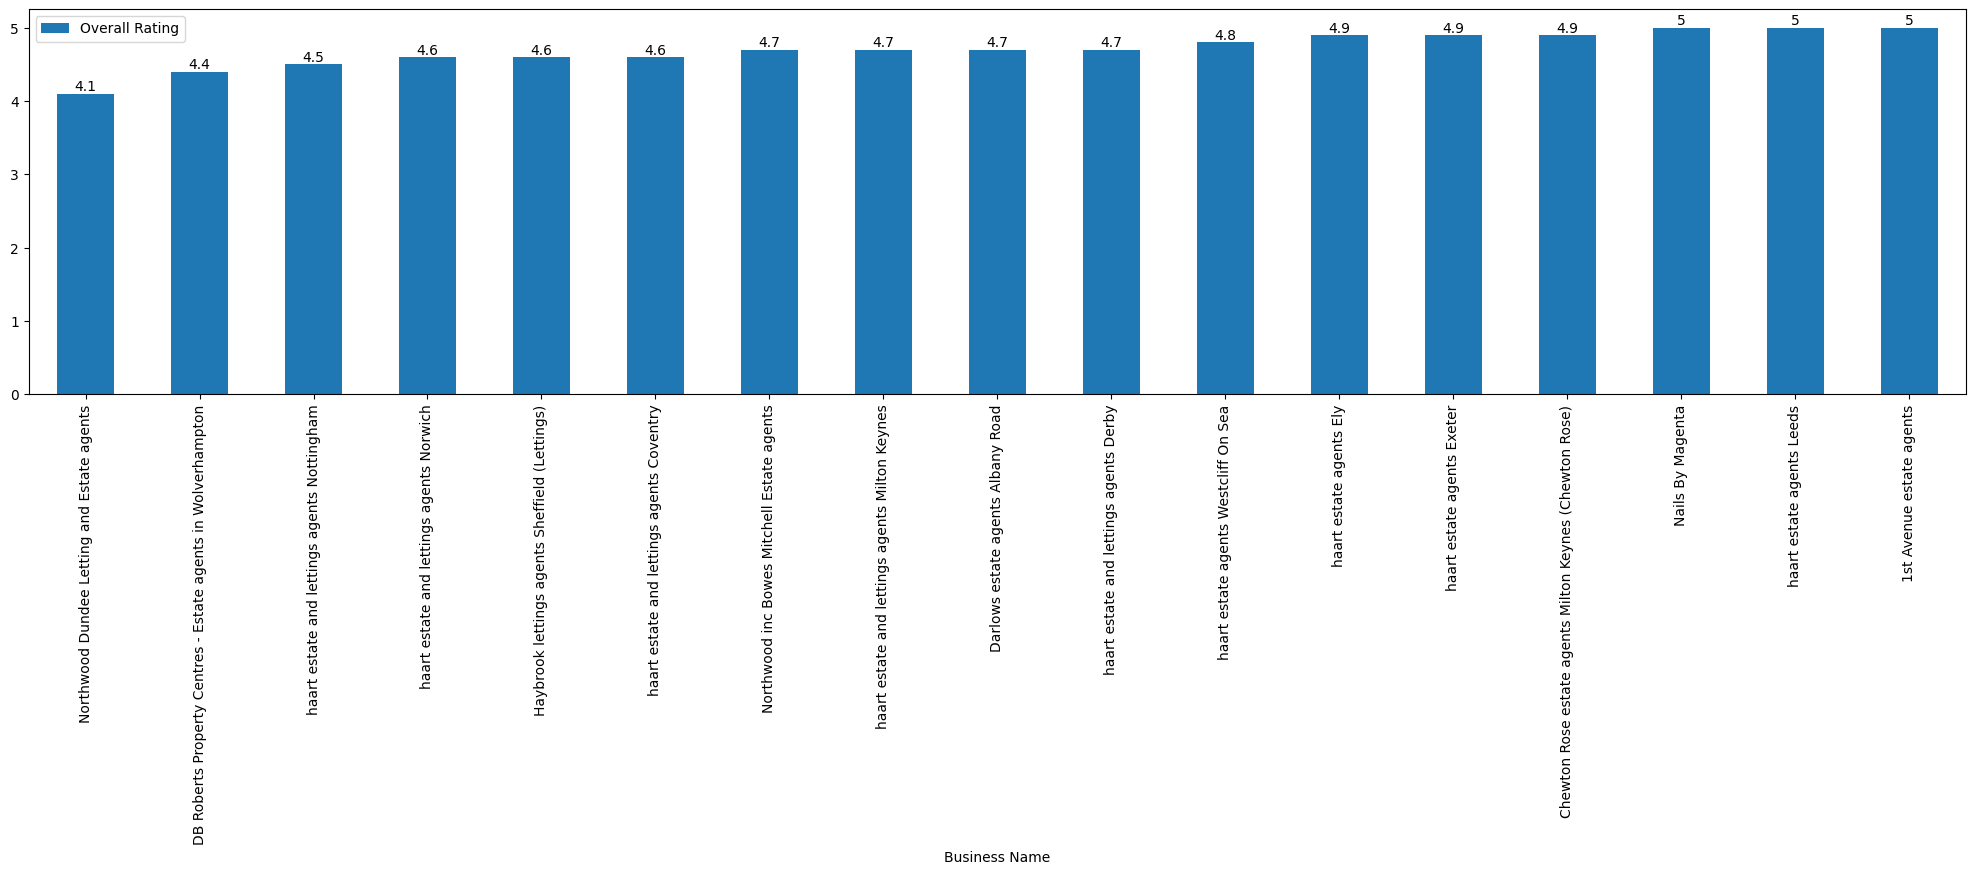

In [6]:
ax = userbusiness.plot.bar(x='Business Name',y='Overall Rating',figsize=(25,5))
ax.bar_label(ax.containers[0])

In [7]:
#potentially all businesss reviews and number of each rating that appear, possibly only interested in bad reviews so may be worth filtering them out

In [8]:
from afinn import Afinn                                             
import plotly.graph_objs as go                                      
from sklearn.preprocessing import StandardScaler                     
from sklearn.cluster import KMeans

In [9]:
labels = df['Rating'].value_counts().index
value = df['Rating'].value_counts().values

In [10]:
fig = go.Figure()
fig.add_trace(trace=go.Bar(x=labels,y=value))

fig.update_layout(height=500,
                width=1000,
                title_text='Frequency Distribution of Rating',
                title_x=0.5,
                yaxis_title='Frequency',
                xaxis_title='Rating')

fig.show()

In [12]:
afinn = Afinn()
df['Sentiment Score'] = df.apply(lambda row: afinn.score(row['lemmatized review']),axis=1) 

In [14]:
# Extract labels and values of positive sentiments
positivelabels = df[df['Sentiment Score'] > 0]['Sentiment Score'].value_counts().index
positivevalues = df[df['Sentiment Score'] > 0]['Sentiment Score'].value_counts().values

# Extract labels and values of neutral sentiments
neutrallabels = df[df['Sentiment Score'] == 0]['Sentiment Score'].value_counts().index
neutralvalues = df[df['Sentiment Score'] == 0]['Sentiment Score'].shape

# Extract labels and values of negative sentiments
negativelabels = df[df['Sentiment Score'] < 0]['Sentiment Score'].value_counts().index
negativevalues = df[df['Sentiment Score'] < 0]['Sentiment Score'].value_counts().values

# Initiate an empty figure
fig = go.Figure()

# Adding a trace of positive sentiments
fig.add_trace(trace=go.Bar(y=positivevalues,
                          x=positivelabels,
                          width=0.4,
                          marker_color='#34A853',
                          name='Positive Sentiments'))

# Adding a trace of neutral sentiments
fig.add_trace(trace=go.Bar(y=neutralvalues,
                          x=neutrallabels,
                          width=0.4,
                          marker_color='#35363A',
                          name='Neutral Sentiments'))

# Adding a trace of negative sentiments
fig.add_trace(trace=go.Bar(y=negativevalues,
                          x=negativelabels,
                          width=0.4, 
                          marker_color='#ed7d31',
                          name='Negative Sentiments'))

# Update the layout with some cosmetics
fig.update_layout(height=500,
                 width=1200,
                 title_text='Freuqency Distribution of Sentiment Scores',
                 title_x=0.5,
                 xaxis_title='Score Label',
                 yaxis_title='Frequency')

# Display the figure
fig.show()

In [ ]:
inertia_vals = []
k_vals = [x for x in range(1,16)]

for i in k-vals:
    k_model = KMeans(n_clusters=i,max_iter=500,random_state=43, n_jobs=-1)
    k_model.fit(scaled_frame)